/tmp/ipykernel_15720/1405720919.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../data/lss_random-0.dr72.dat', delim_whitespace=True)


   324.39755900  -7.35589600  174292  0.0359
0    143.389788    37.917141  331405  0.0129
1    140.247230     0.678009   88412  0.0317
2     57.291195    -7.097998   90115  0.0976
3    215.483011    33.447755  468074  0.0133
4    142.081750    50.638182  182211  0.0147
Index(['324.39755900', '-7.35589600', '174292', '0.0359'], dtype='object')
(1962943, 4)
(1962943, 2)


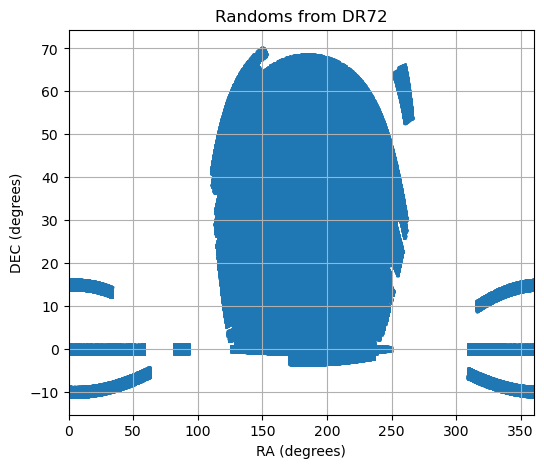

In [7]:
"""
Downloaded randoms file from https://sdss.physics.nyu.edu/lss/dr72/random/
Want to see what they look like
"""

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table


# Read .dat file with ascii and plot RA and DEC
import pandas as pd

df = pd.read_csv('../data/lss_random-0.dr72.dat', delim_whitespace=True)
print(df.head())
print(df.columns)
print(df.shape)

# Extract RA and DEC columns
# First two columns are RA and DEC
randoms = df.iloc[:, :2].values

print(randoms.shape)

plt.figure(figsize=(6, 5))
plt.scatter(randoms[:, 0], randoms[:, 1], s=1, alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('Randoms from DR72')
plt.xlim(0, 360)
plt.grid()
plt.show()


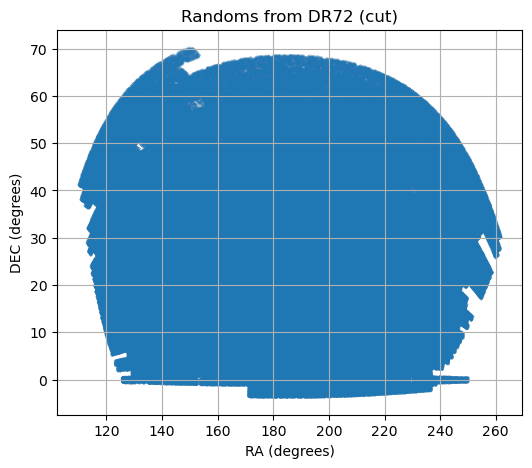

In [11]:
# Let's cut out the central large region
# RA between 100 and 270

mask = (randoms[:, 0] >= 100) & (randoms[:, 0] <= 270)
randoms_cut = randoms[mask]

# Now let's cut out the small region around RA=260, Dec=60
mask2 = ~((randoms_cut[:, 0] >= 250) & (randoms_cut[:, 0] <= 270) &
             (randoms_cut[:, 1] >= 50) & (randoms_cut[:, 1] <= 70))
randoms_cut = randoms_cut[mask2]

plt.figure(figsize=(6, 5))
plt.scatter(randoms_cut[:, 0], randoms_cut[:, 1], s=.01, alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('Randoms from DR72 (cut)')
plt.grid()
plt.show()

In [13]:
# Name first and second columns "ra" and "dec"
# Save to file

randoms_cut_df = pd.DataFrame(randoms_cut, columns=['ra', 'dec'])
randoms_cut_df.to_csv('../data/lss_random-0.dr72_cut.csv', index=False)


/tmp/ipykernel_15720/1640559093.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  randoms1 = pd.read_csv('../data/lss_random-1.dr72.dat', delim_whitespace=True).iloc[:, :2].values


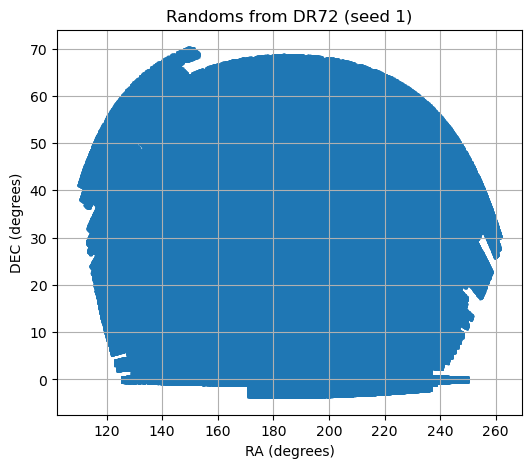

In [18]:
#Checking if the other files in the website have a different seed or what.

randoms1 = pd.read_csv('../data/lss_random-1.dr72.dat', delim_whitespace=True).iloc[:, :2].values

mask1 = (randoms1[:, 0] >= 100) & (randoms1[:, 0] <= 270)
randoms_cut1 = randoms1[mask1]

# Now let's cut out the small region around RA=260, Dec=60
mask12 = ~((randoms_cut1[:, 0] >= 250) & (randoms_cut1[:, 0] <= 270) &
             (randoms_cut1[:, 1] >= 50) & (randoms_cut1[:, 1] <= 70))
randoms_cut1 = randoms_cut1[mask12]

plt.figure(figsize=(6, 5))
plt.scatter(randoms_cut1[:, 0], randoms_cut1[:, 1], s=1, alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('Randoms from DR72 (seed 1)')
plt.grid()
plt.show()


In [29]:
# Looks they are the same, just different seeds. Let's check if they are the same points or not.

import numpy as np

# Load files
r1 = np.loadtxt("../data/lss_random-0.dr72.dat")[:, :2]   # RA, Dec
r2 = np.loadtxt("../data/lss_random-1.dr72.dat")[:, :2]

# Convert rows to a structured dtype so NumPy can compare rows
dtype = np.dtype([('ra', 'f8'), ('dec', 'f8')])

r1_view = r1.view(dtype)
r2_view = r2.view(dtype)

# Find common rows
common = np.intersect1d(r1_view, r2_view)

print("Number of repeated pairs:", len(common))



Number of repeated pairs: 0


/tmp/ipykernel_15720/23014879.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True).iloc[:, :2].values
/tmp/ipykernel_15720/23014879.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True).iloc[:, :2].values


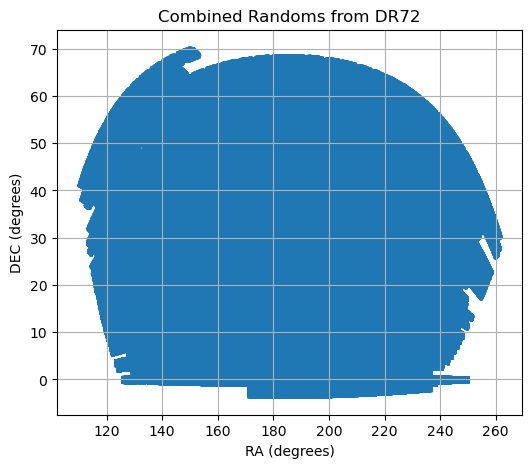

In [30]:
# Read both random catalogs, apply masks, concatenate, and save to a single file

def load_and_mask_randoms(filename):
    data = pd.read_csv(filename, delim_whitespace=True).iloc[:, :2].values
    mask = (data[:, 0] >= 100) & (data[:, 0] <= 270)
    data_cut = data[mask]
    mask2 = ~((data_cut[:, 0] >= 250) & (data_cut[:, 0] <= 270) &
              (data_cut[:, 1] >= 50) & (data_cut[:, 1] <= 70))
    return data_cut[mask2]
randoms0_cut = load_and_mask_randoms('../data/lss_random-0.dr72.dat')
randoms1_cut = load_and_mask_randoms('../data/lss_random-1.dr72.dat')
# Concatenate
randoms_all = np.vstack([randoms0_cut, randoms1_cut])
# Save to CSV
randoms_all_df = pd.DataFrame(randoms_all, columns=['ra', 'dec'])
randoms_all_df.to_csv('../data/lss_randoms_combined_cut.csv', index=False)

# Plot for sanity check
plt.figure(figsize=(6, 5))
plt.scatter(randoms_all[:, 0], randoms_all[:, 1], s=1, alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('Combined Randoms from DR72')
plt.grid()
plt.show()
